
# ARIMA and Seasonal ARIMA


## Autoregressive Integrated Moving Averages

The general process for ARIMA models is the following:
* Visualize the Time Series Data
* Make the time series data stationary
* Plot the Correlation and AutoCorrelation Charts
* Construct the ARIMA Model or Seasonal ARIMA based on the data
* Use the model to make predictions

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df=pd.read_excel('predictsasc.xlsx')

In [ ]:
## Cleaning up the data
df.columns=["Month","Value"]
df.head()

,Month,Value
0,2016-04-01,0.00
1,2016-05-01,0.00
2,2016-06-01,0.00
3,2016-07-01,0.38
4,2016-08-01,3.09


In [ ]:
df.tail()

,Month,Value (in Cr.)
69,2022-01-01,831993.11
70,2022-02-01,826843.00
71,2022-03-01,960581.66
72,2022-04-01,983302.27
73,2022-05-01,1041520.07


In [ ]:
# Convert Month into Datetime
df['Month']=pd.to_datetime(df['Month'])

In [ ]:
df.head()

,Month,Value (in Cr.)
0,2016-04-01,0.00
1,2016-05-01,0.00
2,2016-06-01,0.00
3,2016-07-01,0.38
4,2016-08-01,3.09


In [ ]:
df.set_index('Month',inplace=True)

In [ ]:
df.head()

,Value (in Cr.)
Month,
2016-04-01,0.00
2016-05-01,0.00
2016-06-01,0.00
2016-07-01,0.38
2016-08-01,3.09


In [ ]:
df.describe()

,Value (in Cr.)
count,7.400000e+01
mean,2.388045e+05
std,2.860290e+05
min,0.000000e+00
25%,7.710667e+03
50%,1.442105e+05
75%,3.897760e+05
max,1.041520e+06


## Step 2: Visualize the Data

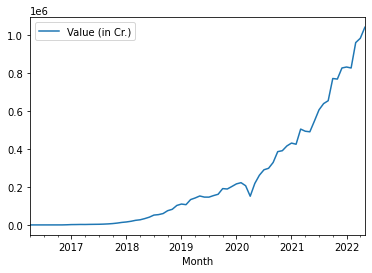

In [ ]:
df.plot()

In [ ]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
test_result=adfuller(df['Value'])

KeyError: ignored

In [ ]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [ ]:
adfuller_test(df['Value'])

KeyError: ignored

## Differencing

In [ ]:
df['Value First Difference'] = df['Value'] - df['Value'].shift(1)

KeyError: ignored

In [ ]:
df['Value'].shift(1)

KeyError: ignored

In [ ]:
df['Seasonal First Difference']=df['Value']-df['Value'].shift(12)

In [ ]:
df.head(14)

,Value,Value First Difference,Seasonal First Difference
Month,,,
2016-04-01,0.00,NaN,NaN
2016-05-01,0.00,0.00,NaN
2016-06-01,0.00,0.00,NaN
2016-07-01,0.38,0.38,NaN
2016-08-01,3.09,2.71,NaN
2016-09-01,32.64,29.55,NaN
2016-10-01,48.57,15.93,NaN
2016-11-01,100.46,51.89,NaN
2016-12-01,707.93,607.47,NaN


In [ ]:
## Again test dickey fuller test
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : 2.528661177616496
p-value : 0.9990585136439838
#Lags Used : 2
Number of Observations Used : 59
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


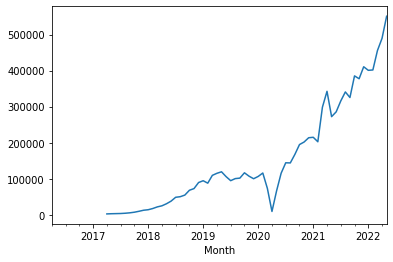

In [ ]:
df['Seasonal First Difference'].plot()

## Auto Regressive Model
![image.png](attachment:image.png)

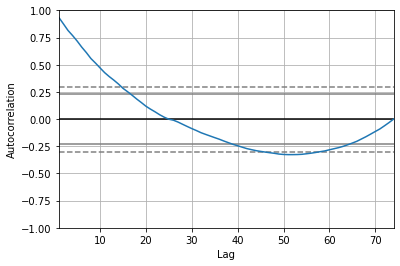

In [ ]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Value'])
plt.show()

### Final Thoughts on Autocorrelation and Partial Autocorrelation

* Identification of an AR model is often best done with the PACF.
    * For an AR model, the theoretical PACF “shuts off” past the order of the model.  The phrase “shuts off” means that in theory the partial autocorrelations are equal to 0 beyond that point.  Put another way, the number of non-zero partial autocorrelations gives the order of the AR model.  By the “order of the model” we mean the most extreme lag of x that is used as a predictor.
    
    
* Identification of an MA model is often best done with the ACF rather than the PACF.
    * For an MA model, the theoretical PACF does not shut off, but instead tapers toward 0 in some manner.  A clearer pattern for an MA model is in the ACF.  The ACF will have non-zero autocorrelations only at lags involved in the model.
    
    p,d,q
    p AR model lags
    d differencing
    q MA lags

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


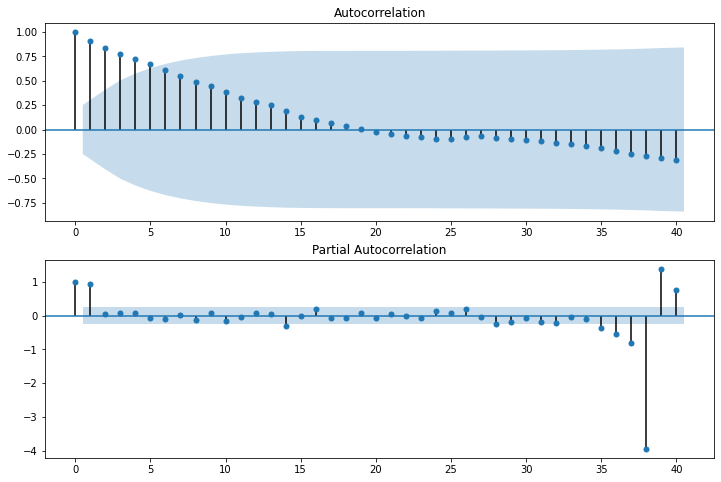

In [ ]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = statsmodels.graphics.tsaplots.plot_acf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = statsmodels.graphics.tsaplots.plot_pacf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax2)

In [ ]:
# For non-seasonal data
#p=1, d=1, q=0 or 1
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
model=ARIMA(df['Value'],order=(1,1,1))
model_fit=model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [ ]:
model_fit.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:1441: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Value   No. Observations:                   73
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -849.003
Method:                       css-mle   S.D. of innovations          26309.788
Date:                Mon, 13 Jun 2022   AIC                           1706.006
Time:                        18:13:52   BIC                           1715.168
Sample:                    05-01-2016   HQIC                          1709.657
                         - 05-01-2022                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.603e+05        nan        nan        nan         nan         nan
ar.L1.D.Value     0.9998        nan        nan        nan         nan         nan
ma.L1.D.Value    -0.8850      0.043    -20.703      0.000      -0.969      -0.801
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0002           +0.0000j            1.0002            0.0000
MA.1            1.1299           +0.0000j            1.1299            0.0000
-----------------------------------------------------------------------------
"""

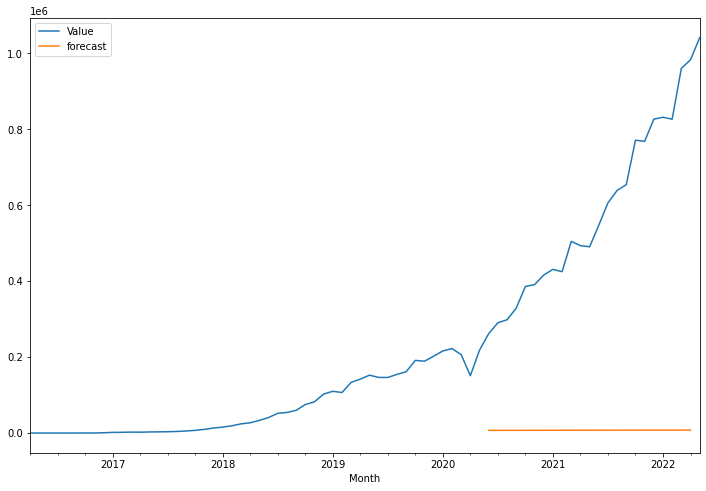

In [ ]:
df['forecast']=model_fit.predict(start=50,end=72,dynamic=True)
df[['Value','forecast']].plot(figsize=(12,8))

In [ ]:
import statsmodels.api as sm

In [ ]:
model=sm.tsa.statespace.SARIMAX(df['Value'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:993: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


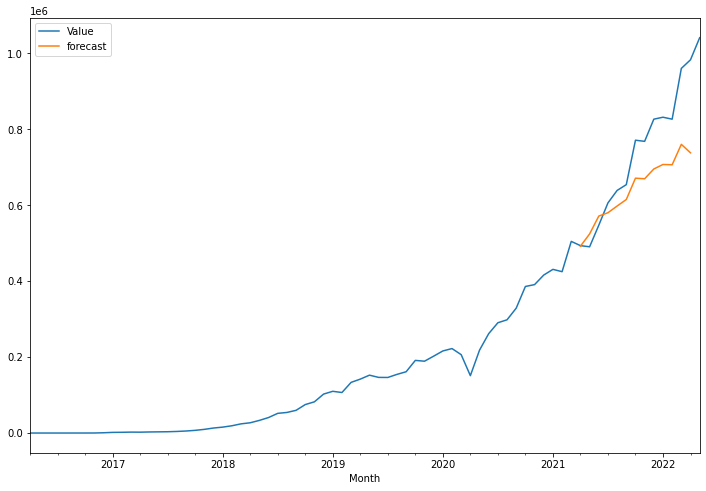

In [ ]:
df['forecast']=results.predict(start=60,end=72,dynamic=True)
df[['Value','forecast']].plot(figsize=(12,8))

In [ ]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [ ]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [ ]:
future_datest_df.tail()

,Value,Value First Difference,Seasonal First Difference,forecast
2023-12-01,NaN,NaN,NaN,NaN
2024-01-01,NaN,NaN,NaN,NaN
2024-02-01,NaN,NaN,NaN,NaN
2024-03-01,NaN,NaN,NaN,NaN
2024-04-01,NaN,NaN,NaN,NaN


In [ ]:
future_df=pd.concat([df,future_datest_df])

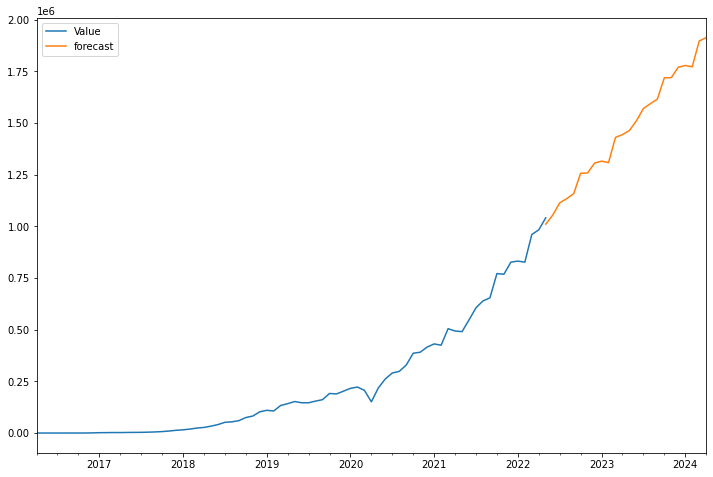

In [ ]:
future_df['forecast'] = results.predict(start = 73, end = 120, dynamic= True)  
future_df[['Value', 'forecast']].plot(figsize=(12, 8)) 